# Домашнее задание 3
### Линейная и логистическая регрессия

Оформление дз:
Присылайте выполненное на почту `mlphystech@gmail.com` файлы .pdf и .ipynb или ссылку на свой гитхаб.

**Дедлайн: 11 апреля 23:59**

*Зуева Надежда*

ФИВТ МФТИ

Это задание будет посвящено линейной и логистической регрессии.
Мы надеемся, что вы уже знаете, что такое `kaggle`, так как сегодня нам предстоит поработать с самым *классическим* датасетом машинного обучения, а именно $-$ с Титаником!


Цель соревнования $-$ предсказать, кто из пассажиров выживет, а кто, увы, нет.

https://www.kaggle.com/c/titanic

## Теоретические вопросы
### 2 балла (по 0.5 за каждый верный ответ)
1. Что такое линейные модели классификации и регрессии? В чем их основные свойства? Где хорошо работают?
2. Что такое регуляризация и как она используется? 
3. Что такое MSE? Приведите пример.
4. Что такое градиентный спуск? Опишите базовый алгоритм работы.

P.S. просьба не копипастить из Википедии. Это все легко вычисляется и будет караться :)

**1.** **Линейная регрессия** - это модель, которая задается формулой:

$$Y = w_0 + \sum_{i=1}^{n}(w_i * x_i) $$

Как и любая другая линейна модель, хорошо работает на статистических данных.
В основном предназначена для получения прогноза непрерывных числовых переменных.

**Плюсы**:
    1. Модель достаточно просто обучить
    2. Можно анализировать, какие признаки лучше или хуже влияют на модель
    3. Очень много процессов можно описать с помощью данной модели
    
**Логистическая регрессия** - алгоритм построения моделей бинарной классификации.
Позволяет ответить на вопрос с бинарным ответом.

Чаще всего применяется в задаче с кредитным скорингом

**Формула**:

$$ f(x) = \frac{1}{1 + e^{-x}} $$

**2.** **Регуляризация** - это штраф, взимаемые с модели, который позволяет избежать её переобучения.
Среди регуляризаций различают $L_1$ и $L_2$ регуляризацию

$$L_1 = \sum_{i=1}^{n} \left | Y_i - f(x_i) \right | $$

$$L_2 = \sum_{i=1}^{n} (Y_i - f(x_i))^2 $$

Регрессия с $L_1$ регуляризацией - $LASSO$ - она зануляет веса модели

Регрессия с $L_2$ регуляризацией - $Ridge$ - уменьшает веса модели

**3.** **MSE - Mean Squared Error**. Оценочная функция потерь. Где **predict** - вектор предсказаний, а $Y_{i}$ - **i**ое предсказание

$$MSE = \frac{1}{n} \sum_{i=1}^{n}(Y_{i} - predict_{i})^2 $$

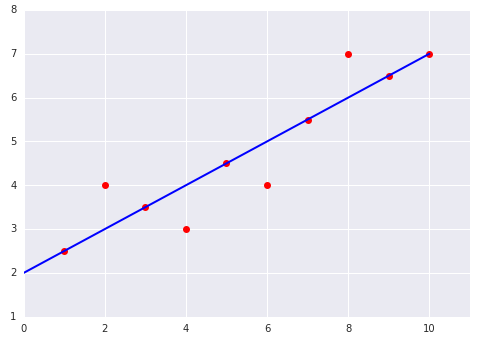

$$MSE = \frac{0^2 + 0^2 + 0^2 + 2^2 + 0^2 + 0^2 + 0^2 + 2^2 + 0^2 + 0^2} {10} = 0.8 $$

**4.** **Градиентный спуск** - это метод нахождения минимума функции(функции ошибки модели). 

Алгоритм работы:
1. Инициализируем вектор весов $w$ начальным занчением $w_0$
2. Пока $\left \| \nabla Q(X', w) \right \| > tol:$

    $w_{k+1} = w_k - \alpha * \nabla Q(X', w_k)$
    
Где $Q(X', w)$ - функция ошибки

## Задание 1 (4 балла)
Скачайте файлы `train.csv` и `test.csv`.

Выведите первые 10 строк из `train.csv`

In [87]:
from copy import deepcopy as dc
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error


data = pd.read_csv("./train.csv") #считайте данные из файла train.csv


In [88]:
#выведите первые 10 строк из data
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Как мы видим, не все данные *

полны*. Например, это видно в столбце `Age`. 
В качестве простейшего решения мы предлагаем заменить пропущенные значения на медианные (функция `numpy.median`)
Вы можете воспользоваться нашим методом или произвести собственный анализ и заменить значения более умным способом (profit: бонусные баллы).

In [89]:
# Replace all the missing ages in the data with the median age
df = dc(data)
df["Age"] = df["Age"].fillna(df["Age"].median())

Теперь займемся **оцифровкой признаков**

Кстати, напомните, а зачем нам это нужно? :)

** Работать с числами удобнее, чем со строками. Все данный нужно приводить к одному виду. **

Какой параметр здесь бинарный? Оцифруйте его при помощи нулей и единиц.

# Ответ

** Потому что с числами удобнее работать, чем со строками **

In [90]:
df.loc[df["Sex"] == "male", "Sex"] = 0 #тут что-то должно быть
df.loc[df["Sex"] == "female", "Sex"] = 1 #тут что-то должно быть

Выведите описание нашего датасета после изменений с помощью функции `describe`.
Сколько процентов пассажиров выжило? Каков был средний возраст всех пассажиров?

In [91]:
print(df.describe())
# df.head(10)

       PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642    0.352413   29.361582   
std     257.353842    0.486592    0.836071    0.477990   13.019697   
min       1.000000    0.000000    1.000000    0.000000    0.420000   
25%     223.500000    0.000000    2.000000    0.000000   22.000000   
50%     446.000000    0.000000    3.000000    0.000000   28.000000   
75%     668.500000    1.000000    3.000000    1.000000   35.000000   
max     891.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch        Fare  
count  891.000000  891.000000  891.000000  
mean     0.523008    0.381594   32.204208  
std      1.102743    0.806057   49.693429  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    7.910400  
50%      0.000000    0.000000   14.454200  
75%      1.000000    0.000000   31.000000  
max      8.000000

Продолжим заполнять пропуски. Рассмотрим графу пунктов отправления `Embarked` 

Там есть типы данных:

C = Cherbourg, Q = Queenstown, S = Southampton, а также `nan`

In [92]:
print(df["Embarked"].unique())
print(df['Survived'].mean())
print(df['Age'].mean())

['S' 'C' 'Q' nan]
0.3838383838383838
29.36158249158249


In [93]:
import collections
print(collections.Counter(df['Embarked']))

Counter({'S': 644, 'C': 168, 'Q': 77, nan: 2})


С учетом последней ячейки заполните пропущенные значения по своему усмотрению. Объясните свой выбор, затем оцифруйте признак `Embarked` 

Например, заменив все на {0,1,2} или {12,42,10}, как хотите :)

In [94]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,28.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C


In [95]:
df["Embarked"] = df["Embarked"].fillna("S")
# тут ваш код c оцифровкой
# df = df[pd.notnull(df['Embarked'])]

df.loc[df['Embarked'] == 'S', 'Embarked'] = 0
df.loc[df['Embarked'] == 'C', 'Embarked'] = 1
df.loc[df['Embarked'] == 'Q', 'Embarked'] = 2
print(df["Embarked"].unique())

[0 1 2]


Разобьем выборку на `X` и `y`, где для`y` будем строить предсказания

In [96]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [97]:
y = pd.Series(df['Survived'])

In [98]:

df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare'], axis=1, inplace=True)
X = df.copy()
X.drop('Survived', axis = 1, inplace=True)

'''
X.drop('Survived', axis=1, inplace=True)
X.drop('Name', axis=1, inplace=True)
X.drop('Ticket', axis=1, inplace=True)
X.drop('Cabin', axis=1, inplace=True)
'''

"\nX.drop('Survived', axis=1, inplace=True)\nX.drop('Name', axis=1, inplace=True)\nX.drop('Ticket', axis=1, inplace=True)\nX.drop('Cabin', axis=1, inplace=True)\n"

Каким образом можно отобрать фичи, которые будут влиять на наш скор? Тут нам помогут ваш жизненный опыт и ` Recursive Feature Elimination` из библиотеки `Sklearn` 

In [99]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

clf = Ridge(alpha=0.3)
selector = RFE(clf)

selector = selector.fit(X, y)
print(sorted(zip(map(lambda x: round(x, 4), selector.ranking_), list(X.columns.values))))

[(1, 'Embarked'), (1, 'Pclass'), (1, 'Sex'), (2, 'SibSp'), (3, 'Parch'), (4, 'Age')]


Проверьте, похожи ли отобранные вами фичи на те, что представленны ниже?

In [100]:
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

In [101]:
kfold = KFold(random_state=1)
X = df[df.columns[2:]].values

Выполним предсказания:

In [102]:
predicts = []

model = LinearRegression()

for train, test in kfold.split(X):
    model.fit(X[train], y[train])
    predicts.append(model.predict(X[test]))
predicts = np.concatenate(predicts)


predicts[predicts > 0.5],predicts[predicts < 0.5] = 1,0


accuracy = np.count_nonzero(df["Survived"] == predicts) / df["Survived"].count()
print ('Скор для линейной регрессии:',accuracy)


Скор для линейной регрессии: 0.7901234567901234


## Задание 2 (2 балла)
Теперь попробуем проделать то же самое для **логистической регрессии**

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [103]:
model = LogisticRegression(C = 10, fit_intercept = True) # 

Вычислим оценку точности для всех кросс-валидационных фолдов: возвращаем массив баллов из 3-х фолдов

In [104]:
#тут ваш код
predicts = np.array([])

for train, test in kfold.split(X):
    model.fit(X[train], y[train])
    predicts = np.append(predicts, accuracy_score(model.predict(X[test]), y[test]))

print(predicts)
print("Скор для логистической регрессии: " + str(predicts.mean()))

[0.8013468  0.78787879 0.78451178]
Скор для логистической регрессии: 0.7912457912457912


###### Как бы вы объяснили прирост качества в логистической регрессии? 

# Я думаю, что логистическая регрессия лучше подходит для данной задачи, поэтому скор больше.
Сможете побить наш бейзлайн? :)

## Задание 3 (1.5 балла)
Отправьте ваше решение в тестирующую систему и посмотрите, какое место вы займете

рассмотрим `test.csv`

In [105]:
df_test = pd.read_csv("test.csv")
print(df_test.describe())



       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


Надо вернуть оцифрованные данные к первоначальному виду:

In [106]:
#тут ваш код по возвращению оцифрованных параметров в первоначальный вид

df_test.loc[df_test['Sex'] == 'male', 'Sex'] = 0
df_test.loc[df_test['Sex'] == 'female', 'Sex'] = 1

df_test.loc[df_test['Embarked'] == 'S', 'Embarked'] = 0 
df_test.loc[df_test['Embarked'] == 'C', 'Embarked'] = 1
df_test.loc[df_test['Embarked'] == 'Q', 'Embarked'] = 2

df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())

df = df_test.copy()
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare'], axis=1, inplace=True)


X = df[df.columns[1:]].values
predicts = model.predict(X)

submission = pd.DataFrame({
    "PassengerId": df_test["PassengerId"],
    "Survived": predicts
})

submission.to_csv("submission.csv", index=False) #вот это отправляется в каггл

Можете попробовать и дальше "поиграться" с параметрами, чтобы подняться в лидерборде. Например, попробовать подобрать параметры в регрессорах. 
Удачи!
    Напоминаем, что справку по любой функции (в том числе и по регрессорам) можно получить, если с наведенным курсором на функцию нажать `Tab`+`Shift`